Goal : Regression Analysis for Predicting Boston House Prices

Data Description : 
Reference : **https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d**

CRIM: This is the per capita crime rate by town.
ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
INDUS: This is the proportion of non-retail business acres per town.
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise).
NOX: This is the nitric oxides concentration (parts per 10 million).
RM: This is the average number of rooms per dwelling.
AGE: This is the proportion of owner-occupied units built prior to 1940.
DIS: This is the weighted distances to five Boston employment centers.
RAD: This is the index of accessibility to radial highways.
TAX: This is the full-value property-tax rate per $10,000.
PTRATIO: This is the pupil-teacher ratio by town.
B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town.
LSTAT: This is the percentage lower status of the population.
MEDV: This is the median value of owner-occupied homes in $1000s.






Data Importing & Description of data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data=load_boston()


In [ ]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [ ]:
dataset=pd.DataFrame(data.data,columns=data.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
dataset["target"]=data.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
dataset.shape

(506, 14)

In [17]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
co=dataset.corr()

<function matplotlib.pyplot.show>

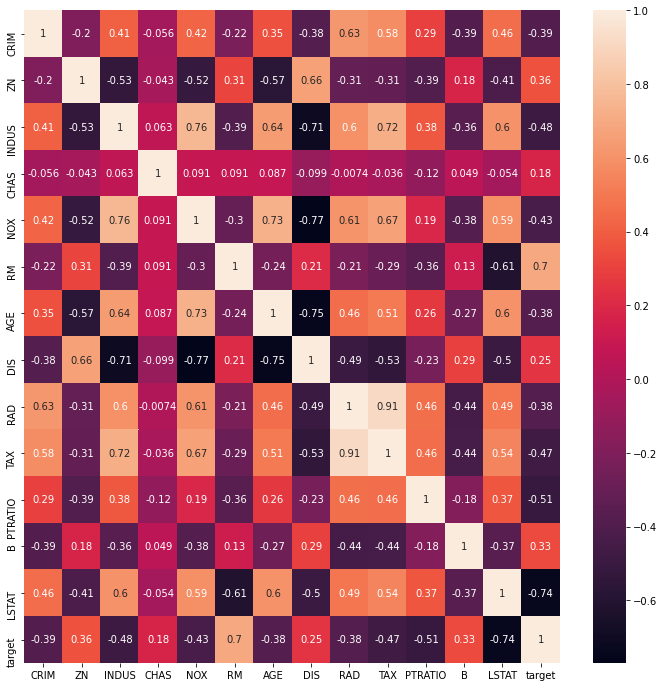

In [22]:
plt.figure(figsize=[12,12])
sns.heatmap(co,annot=True)
plt.show



Splitting of Data

In [23]:
x=dataset.drop("target",axis="columns")
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
y=dataset["target"]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


Model Building

In [30]:
from xgboost import XGBRegressor 

In [31]:
xgb=XGBRegressor()

In [32]:
xgb.fit(x_train,y_train)

[19:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [34]:
training_prediction=xgb.predict(x_train)

In [35]:
from sklearn import metrics

In [36]:
score1=metrics.r2_score(y_train,training_prediction)
print(score1)

0.9733349094832763


In [37]:
score2=metrics.mean_absolute_error(y_train,training_prediction)
print(score2)

1.145314053261634


In [38]:
testing_prediction=xgb.predict(x_test)

In [39]:
score11=metrics.r2_score(y_test,testing_prediction)
print(score11)

0.9115937697657654


In [40]:
score22=metrics.mean_absolute_error(y_test,testing_prediction)
print(score22)

1.9922956859364223


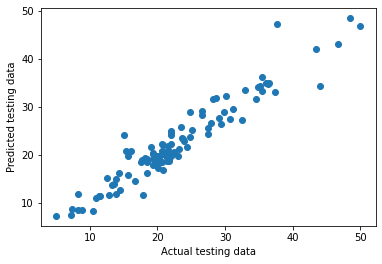

In [41]:
plt.scatter(y_test,testing_prediction)
plt.xlabel("Actual testing data")
plt.ylabel("Predicted testing data")
plt.show()